# Prédiction du diabète

Projet du module **Intelligence Artificielle** – ENSAM Casablanca  

Auteurs : **Ilias Nadmi** & **Ali Tayar** 

## 1. Contexte du projet

Le diabète est une maladie chronique qui touche des millions de personnes dans le monde.
Un diagnostic précoce permet de mieux prendre en charge les patients et de réduire le risque
de complications graves (problèmes cardiovasculaires, rénaux, neurologiques, etc.).

Dans ce projet, nous nous intéressons à la prédiction du diabète à partir de caractéristiques
médicales simples (par exemple : âge, indice de masse corporelle (IMC), pression artérielle,
taux de glucose, etc.).

L’objectif est d’utiliser des techniques d’intelligence artificielle, et plus précisément 
l’apprentissage supervisé, pour construire un modèle capable d’estimer si un patient présente 
un risque de diabète à partir de ses données.

### Problématique

Comment utiliser des données médicales (âge, IMC, taux de glucose, etc.) pour prédire 
si un patient est susceptible d’être diabétique, en s’appuyant sur un modèle d’apprentissage 
automatique fiable et interprétable ?

### Objectifs du projet

1. Comprendre et explorer un jeu de données médicales lié au diabète.
2. Préparer les données (nettoyage, gestion des valeurs manquantes, normalisation, etc.).
3. Mettre en place un ou plusieurs modèles de classification (régression logistique, Random Forest, etc.).
4. Évaluer les performances des modèles (accuracy, précision, rappel, F1-score, matrice de confusion).
5. Discuter les limites du modèle et les pistes d’amélioration possibles.
   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Options d'affichage
pd.set_option("display.max_columns", None)
sns.set()  # style graphique par défaut


## 2. Chargement et première exploration des données

Dans cette section, nous chargeons le jeu de données sur le diabète 
(Pima Indians Diabetes Dataset) et nous regardons rapidement sa structure 
(nombre de lignes, colonnes, types, valeurs manquantes, etc.).


In [2]:
data_path = "../data/diabetes.csv"

data = pd.read_csv(data_path)

# Aperçu des 5 premières lignes
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print("Dimensions du dataset :", data.shape)

print("\nTypes de variables :")
print(data.dtypes)

print("\nValeurs manquantes par colonne :")
print(data.isna().sum())

print("\nStatistiques descriptives :")
data.describe()


Dimensions du dataset : (768, 9)

Types de variables :
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Valeurs manquantes par colonne :
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Statistiques descriptives :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 3. Distribution de la variable cible

Nous regardons la répartition des patients diabétiques (1) et non diabétiques (0).


In [4]:
target_column = "Outcome"

data[target_column].value_counts(), data[target_column].value_counts(normalize=True)


(Outcome
 0    500
 1    268
 Name: count, dtype: int64,
 Outcome
 0    0.651042
 1    0.348958
 Name: proportion, dtype: float64)

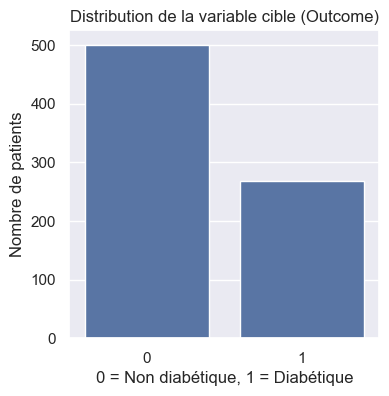

In [5]:
plt.figure(figsize=(4, 4))
sns.countplot(x=data[target_column])
plt.title("Distribution de la variable cible (Outcome)")
plt.xlabel("0 = Non diabétique, 1 = Diabétique")
plt.ylabel("Nombre de patients")
plt.show()


## 4. Analyse exploratoire visuelle

Nous visualisons :
- la distribution de quelques variables clés (Glucose, BMI, Age) ;
- la matrice de corrélation entre les variables.


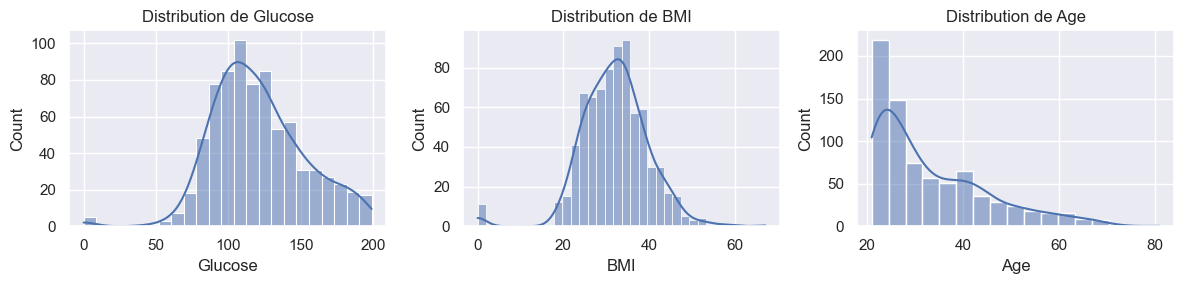

In [6]:
features_to_plot = ["Glucose", "BMI", "Age"]

plt.figure(figsize=(12, 3))

for i, col in enumerate(features_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution de {col}")

plt.tight_layout()
plt.show()


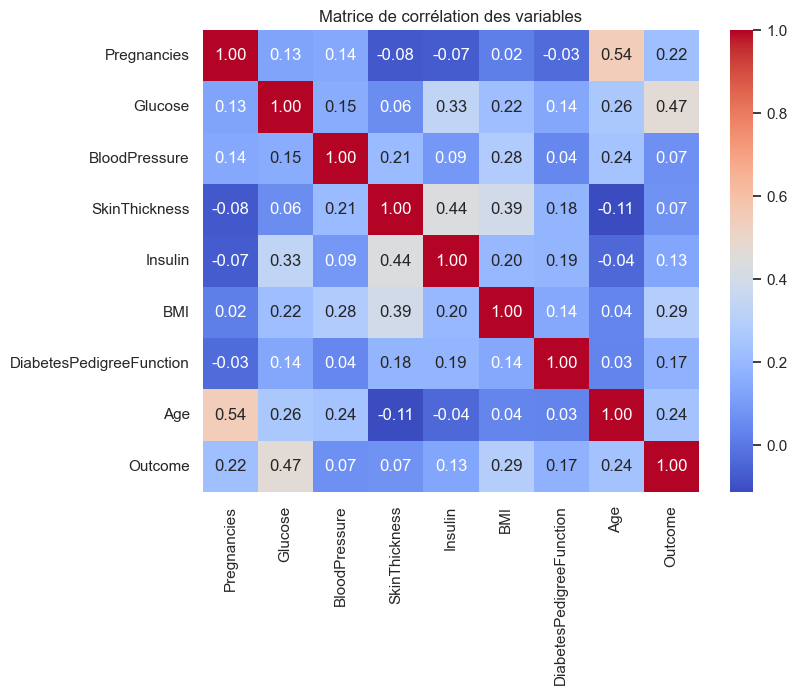

In [7]:
plt.figure(figsize=(8, 6))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation des variables")
plt.show()
